In [1]:
import sys
sys.path.append('../../../')

In [2]:
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

import pickle
import argparse
import time
import itertools
from copy import deepcopy
    
%load_ext autoreload
%autoreload 2

In [3]:
with open('DIS1_2/summaries_5_0/all_results', 'rb') as f:
    all_results_1_2 = pickle.load(f)
with open('DIS1_3/summaries_5_0/all_results', 'rb') as f:
    all_results_1_3 = pickle.load(f)
with open('DIS1b_2/summaries_5_0/all_results', 'rb') as f:
    all_results_1b_2 = pickle.load(f)

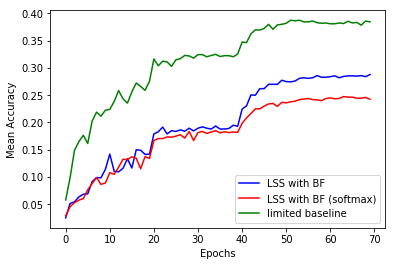

In [4]:
task = 19
for k, v_1_2 in all_results_1_2[task].items():
    plt.plot(np.concatenate((np.mean(np.array(v_1_2[0]['val_acc']), axis=0), np.mean(np.array(v_1_2[1]['val_acc']), axis=0))), color='b', label='LSS with BF')
    break

for k, v_1_3 in all_results_1_3[task].items():
    plt.plot(np.concatenate((np.mean(np.array(v_1_3[0]['val_acc']), axis=0), np.mean(np.array(v_1_3[1]['val_acc']), axis=0))), color='r', label='LSS with BF (softmax)')
    break
    
for k, v_1b_2 in all_results_1b_2[task].items():
    plt.plot(np.concatenate((np.mean(np.array(v_1b_2[0]['val_acc']), axis=0), np.mean(np.array(v_1b_2[1]['val_acc']), axis=0))), color='g', label='limited baseline')
    break
plt.xlabel('Epochs')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.savefig('DIS_1_2_vs_1b_2_mean_plot.pdf')

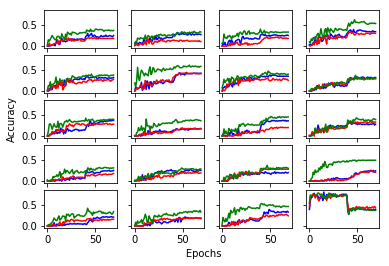

In [6]:
nrows = 5
ncols = 4
f, axarr = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
for i in range(nrows):
    for j in range(ncols):
        axarr[i, j].plot(np.concatenate((np.array(v_1_2[0]['val_acc'])[i * ncols + j], np.array(v_1_2[1]['val_acc'])[i * ncols + j])), color='b')
        axarr[i, j].plot(np.concatenate((np.array(v_1_3[0]['val_acc'])[i * ncols + j], np.array(v_1_3[1]['val_acc'])[i * ncols + j])), color='r')
        axarr[i, j].plot(np.concatenate((np.array(v_1b_2[0]['val_acc'])[i * ncols + j], np.array(v_1b_2[1]['val_acc'])[i * ncols + j])), color='g')
        if (j == 0 and i == 2):
            axarr[i, j].set_ylabel('Accuracy')
        if (i == 4 and j == 1):
            axarr[i, j].set_xlabel('                       Epochs')
plt.savefig('DIS_1_2_vs_1b_2_final_all_task_plots.pdf')